In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import sys
sys.path.append("../../../../src/")
import tunneling

from scipy.optimize import curve_fit
plt.style.use(["science","bright","grid"])

In [4]:
def get_linear_volt_ranges(N_x, N_y, ref_electrodes=[1,3], I_ref=1e-9, alpha=0.3):

    electrode_pos   = [[0,0],[int((N_x-1)/2),0],[N_x-1,0],[0,int((N_y-1)/2)],[0,N_y-1],
                       [N_x-1,int((N_y)/2)],[int((N_x)/2),(N_y-1)],[N_x-1,N_y-1]]
    electrode_type  = ['constant']*len(electrode_pos)
    lattice         = tunneling.NanoparticleTunneling(electrode_type)

    lattice.lattice_network(N_x, N_y)
    lattice.add_electrodes_to_lattice_net(electrode_pos)
    lattice.init_nanoparticle_radius()
    lattice.pack_planar_circles()
    lattice.init_adv_indices()
    lattice.init_junction_resistances()
    lattice.build_conductance_matrix()
    lattice.init_transfer_coeffs()
    lattice.calibrate_electrodes(ref_electrodes, I_ref, alpha)

    return lattice.get_delta_V()

In [31]:
N_vals   = np.arange(3,17)
alphas   = [0.3,0.5,0.8,1.0]
ref_idx  = [1,3]
data     = {alpha: pd.DataFrame(np.array([get_linear_volt_ranges(N, N, ref_electrodes=ref_idx, alpha=alpha) for N in N_vals])) for alpha in alphas}

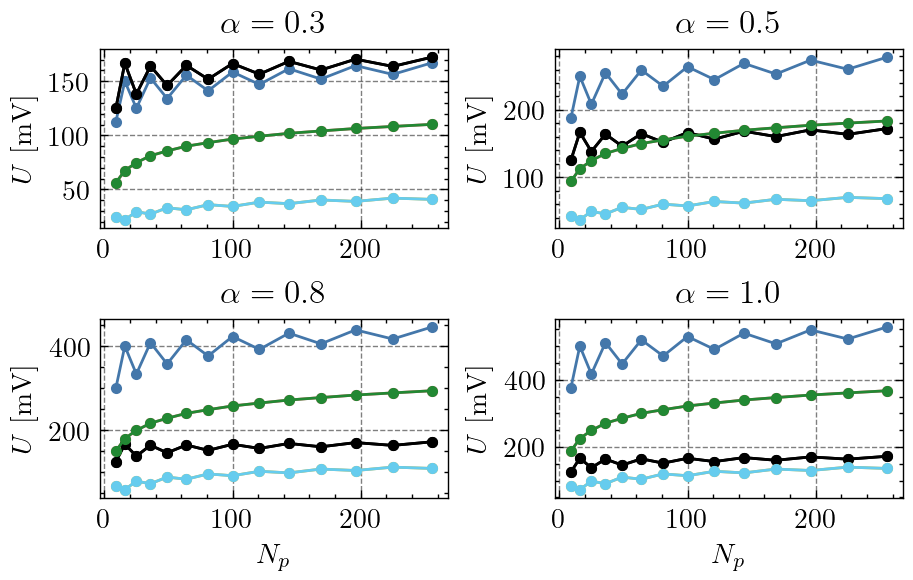

In [50]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.3)
fig.set_figheight(fig.get_figheight()*1.1)
for i, alpha in enumerate(alphas):
    ax = fig.add_subplot(2,2,i+1)
    for e in range(7):
        if e not in ref_idx:
            ax.plot(N_vals**2, data[alpha][e]*1000, '.-')
        else:
            ax.plot(N_vals**2, data[alpha][e]*1000, '.-', color='black')
    if i >= 2:
        ax.set_xlabel("$N_p$")
    ax.set_ylabel("$U$ [mV]")
    ax.set_title(f"$\\alpha = {alpha}$")